In [418]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import lat_lon

ModuleNotFoundError: No module named 'lat_lon'

In [4]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.0rc0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/robinrichards/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/no

In [6]:
website_url = requests.get('http://citypopulation.de/en/uk/greaterlondon/').text
website_url

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="description" content="Greater London (United Kingdom): Boroughs with population statistics, charts and maps.">\n<title>Greater London (United Kingdom): Boroughs - Population Statistics, Charts and Map</title>\n<link rel="shortcut icon" href="/favicon.ico">\r\n<script>var pagemode = \'adminpage\'; var pagecat = \'admin_city\'; var isAdmin = false; var pageid = \'uk-greaterlondon\'; var pagelang = \'en\'; var pagelabel = "Greater London"; var popDate = \'E 2018-06-30\'; var popcolnum  = 5; var start_x = -0.087; var start_y = 51.489; var start_level = 10; var swap_width = 1325; var hor_percent = 44; var vert_percent = 37; var swap = \'true\'; var mapcopyright = \'Ordnance Survey data © Crown copyright and database right 2012.\'; var objid = \'\'; var objtype = \'\'; var startmap = \'street\'; var lev_num = 1; var edit_mode = \'\'; var placeLocale = \'en\'; var nativeName = false; var wikiFromWD = false

In [7]:
soup = BeautifulSoup(website_url,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8">
   <meta content="Greater London (United Kingdom): Boroughs with population statistics, charts and maps." name="description">
    <title>
     Greater London (United Kingdom): Boroughs - Population Statistics, Charts and Map
    </title>
    <link href="/favicon.ico" rel="shortcut icon">
     <script>
      var pagemode = 'adminpage'; var pagecat = 'admin_city'; var isAdmin = false; var pageid = 'uk-greaterlondon'; var pagelang = 'en'; var pagelabel = "Greater London"; var popDate = 'E 2018-06-30'; var popcolnum  = 5; var start_x = -0.087; var start_y = 51.489; var start_level = 10; var swap_width = 1325; var hor_percent = 44; var vert_percent = 37; var swap = 'true'; var mapcopyright = 'Ordnance Survey data © Crown copyright and database right 2012.'; var objid = ''; var objtype = ''; var startmap = 'street'; var lev_num = 1; var edit_mode = ''; var placeLocale = 'en'; var nativeNa

In [8]:
my_table = soup.find('table',{'class':'data'})
my_table

<table class="data" id="ts">
<thead>
<tr><th class="rname" data-coltype="name" onclick="javascript:sort('ts',0,false)"><a href="javascript:sort('ts',0,false)">Name</a></th><th class="rstatus" data-coltype="status" onclick="javascript:sort('ts',1,false)"><a href="javascript:sort('ts',1,false)">Status</a></th><th class="rpop prio5" data-coldate="1981-06-30" data-colhead="E 1981-06-30" data-coltype="pop" onclick="javascript:sort('ts',2,true)"><a href="javascript:sort('ts',2,true)">Population</a><br><span class="unit">Estimate<br>1981-06-30</br></span><th class="rpop prio4" data-coldate="1991-06-30" data-colhead="E 1991-06-30" data-coltype="pop" onclick="javascript:sort('ts',3,true)"><a href="javascript:sort('ts',3,true)">Population</a><br><span class="unit">Estimate<br>1991-06-30</br></span><th class="rpop prio3" data-coldate="2001-06-30" data-colhead="E 2001-06-30" data-coltype="pop" onclick="javascript:sort('ts',4,true)"><a href="javascript:sort('ts',4,true)">Population</a><br><span cla

In [9]:
values = my_table.findAll('tr')
values

[<tr><th class="rname" data-coltype="name" onclick="javascript:sort('ts',0,false)"><a href="javascript:sort('ts',0,false)">Name</a></th><th class="rstatus" data-coltype="status" onclick="javascript:sort('ts',1,false)"><a href="javascript:sort('ts',1,false)">Status</a></th><th class="rpop prio5" data-coldate="1981-06-30" data-colhead="E 1981-06-30" data-coltype="pop" onclick="javascript:sort('ts',2,true)"><a href="javascript:sort('ts',2,true)">Population</a><br><span class="unit">Estimate<br>1981-06-30</br></span><th class="rpop prio4" data-coldate="1991-06-30" data-colhead="E 1991-06-30" data-coltype="pop" onclick="javascript:sort('ts',3,true)"><a href="javascript:sort('ts',3,true)">Population</a><br><span class="unit">Estimate<br>1991-06-30</br></span><th class="rpop prio3" data-coldate="2001-06-30" data-colhead="E 2001-06-30" data-coltype="pop" onclick="javascript:sort('ts',4,true)"><a href="javascript:sort('ts',4,true)">Population</a><br><span class="unit">Estimate<br>2001-06-30</br

In [431]:
v = []
for tr in values:
    td = tr.find_all('td')
    row = [i.text for i in td]
    v.append(row)
df = pd.DataFrame.from_records(v)

#populate a list of lists with the row from each table, then add that into a dataframe

In [432]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,Barking and Dagenham,Borough,"161,300","155,500","165,700","187,029","211,998",→,Barnet,Borough,...,Sikh,"126,134",Jewish,"148,602",Buddhist,"82,026",Other religion,"47,970",No religion,"1,694,372"
1,Barking and Dagenham,Borough,"161,300","155,500","165,700","187,029","211,998",→,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Barnet,Borough,"295,200","297,700","319,500","357,538","392,140",→,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Bexley,Borough,"217,400","218,100","218,800","232,774","247,258",→,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Brent,Borough,"248,300","240,800","269,600","312,245","330,795",→,None,None,...,None,None,None,None,None,None,None,None,None,None


In [433]:
df = df[[0,4,6]]  #I'm only interested in the last 20 years

In [434]:
df.columns=['Borough','2001 Population', '2018 Population']

In [435]:
df = df.drop(df.index[34:79]) #remove unnecessary rows
df

,Borough,2001 Population,2018 Population
0,Barking and Dagenham,"165,700","211,998"
1,Barking and Dagenham,"165,700","211,998"
2,Barnet,"319,500","392,140"
3,Bexley,"218,800","247,258"
4,Brent,"269,600","330,795"
5,Bromley,"296,200","331,096"
6,Camden,"202,600","262,226"
7,City of London,"7,400","8,706"
8,City of Westminster,"203,300","255,324"
9,Croydon,"335,100","385,346"


In [436]:
df = df.drop(df.index[0])
df = df.drop(df.index[6])# the city of london isn't technically a borough so I won't include it

In [437]:
df['2001 Population'] = df['2001 Population'].str.replace(',', '')
df['2018 Population'] = df['2018 Population'].str.replace(',', '')  #remove the commas from the population numbers to convert to integer

In [438]:
df['2001 Population'] = df['2001 Population'].astype(int)
df['2018 Population'] = df['2018 Population'].astype(int)  #convert population columns to integers

In [439]:
df

,Borough,2001 Population,2018 Population
1,Barking and Dagenham,165700,211998
2,Barnet,319500,392140
3,Bexley,218800,247258
4,Brent,269600,330795
5,Bromley,296200,331096
6,Camden,202600,262226
8,City of Westminster,203300,255324
9,Croydon,335100,385346
10,Ealing,307300,341982
11,Enfield,277300,333869


In [440]:
df['Percentage Change'] = (df['2018 Population']/df['2001 Population'])*100 #create a column for percentage change

In [441]:
print(df.dtypes)  #check that the data types were changed properly

Borough               object
2001 Population        int64
2018 Population        int64
Percentage Change    float64
dtype: object


In [442]:
df

,Borough,2001 Population,2018 Population,Percentage Change
1,Barking and Dagenham,165700,211998,127.940857
2,Barnet,319500,392140,122.735524
3,Bexley,218800,247258,113.006399
4,Brent,269600,330795,122.698442
5,Bromley,296200,331096,111.781229
6,Camden,202600,262226,129.430405
8,City of Westminster,203300,255324,125.589769
9,Croydon,335100,385346,114.994330
10,Ealing,307300,341982,111.286040
11,Enfield,277300,333869,120.399928


Now that we have a list of the London boroughs showing how much their population has grown over the past 20 years, let's see which boroughs have grown the most.

In [443]:
df.sort_values(by = 'Percentage Change', ascending=False).head(10)

,Borough,2001 Population,2018 Population,Percentage Change
31,Tower Hamlets,201100,317705,157.983590
26,Newham,249400,352005,141.140738
13,Hackney,207200,279665,134.973456
20,Islington,179400,239142,133.301003
12,Greenwich,217500,286186,131.579770
6,Camden,202600,262226,129.430405
1,Barking and Dagenham,165700,211998,127.940857
27,Redbridge,241900,303858,125.613063
8,City of Westminster,203300,255324,125.589769
19,Hounslow,216000,270782,125.362037


Now we need to add in the lat long of each borough so that Foursquare will be able to locate it

In [444]:
df_latlong = pd.read_csv('/Users/robinrichards/Documents/My Files/Coursera/LatLong.csv')

In [445]:
df_latlong.head()

,Borough,Lat,Long
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


Now we need to join the two dataframes together

In [446]:
df = pd.merge(df, df_latlong, on='Borough')

In [627]:
df

,Borough,2001 Population,2018 Population,Percentage Change,Lat,Long
0,Barking and Dagenham,165700,211998,127.940857,51.5607,0.1557
1,Barnet,319500,392140,122.735524,51.6252,-0.1517
2,Bexley,218800,247258,113.006399,51.4549,0.1505
3,Brent,269600,330795,122.698442,51.5588,-0.2817
4,Bromley,296200,331096,111.781229,51.4039,0.0198
5,Camden,202600,262226,129.430405,51.5290,-0.1255
6,City of Westminster,203300,255324,125.589769,51.4973,-0.1372
7,Croydon,335100,385346,114.994330,51.3714,-0.0977
8,Ealing,307300,341982,111.286040,51.5130,-0.3089
9,Enfield,277300,333869,120.399928,51.6538,-0.0799


Now we need to get our data on where the shopping centres are from Foursqaure

In [149]:
CLIENT_ID = '1RGT2OJJAP4O4EFHV3QGKKKWQV3PCK1UNHDGZ0IY1CTL255Y' # your Foursquare ID
CLIENT_SECRET = '0I2B2Y4J2L1HAF34XNUH5B4YGQAVKWYBARQH0TUYKO0PHBXB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1RGT2OJJAP4O4EFHV3QGKKKWQV3PCK1UNHDGZ0IY1CTL255Y
CLIENT_SECRET:0I2B2Y4J2L1HAF34XNUH5B4YGQAVKWYBARQH0TUYKO0PHBXB


In [585]:
radius = 1000
LIMIT = 100

venues = []

for Lat, Long, Borough in zip(df['Lat'], df['Long'], df['Borough']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        Lat,
        Long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append(( 
            Borough,
            Lat, 
            Long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [586]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2265, 7)


,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,51.5607,0.1557,Shell,51.560415,0.148364,Gas Station
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


In [587]:
venues_df.groupby(['VenueCategory']).count() #display the number of unique venue categories

,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude
VenueCategory,,,,,,
Afghan Restaurant,1,1,1,1,1,1
African Restaurant,3,3,3,3,3,3
Airport,1,1,1,1,1,1
Airport Lounge,1,1,1,1,1,1
Airport Service,3,3,3,3,3,3
...,...,...,...,...,...,...
Wine Shop,3,3,3,3,3,3
Winery,1,1,1,1,1,1
Wings Joint,1,1,1,1,1,1


In [641]:
plot = venues_df.groupby('Borough').count()
plot

,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Borough,,,,,,
Barking and Dagenham,16,16,16,16,16,16
Barnet,8,8,8,8,8,8
Bexley,48,48,48,48,48,48
Brent,95,95,95,95,95,95
Bromley,62,62,62,62,62,62
Camden,100,100,100,100,100,100
City of Westminster,100,100,100,100,100,100
Croydon,83,83,83,83,83,83
Ealing,100,100,100,100,100,100


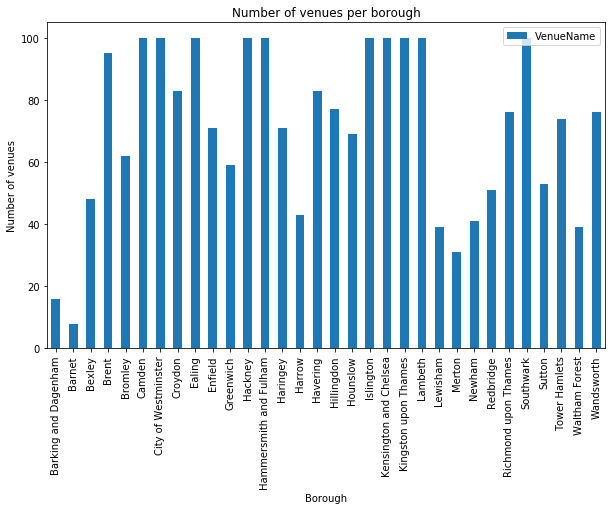

In [651]:
import matplotlib
import matplotlib.pyplot as plt
borough_venue = plot.filter(['Borough', 'VenueName'], axis=1)

borough_venue.plot(kind='bar', figsize = (10,6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Number of venues per borough') # add title to the plot

plt.show()

In [589]:
is_shopping_mall = venues_df['VenueCategory'] == 'Shopping Mall'
shopping_malls = venues_df[is_shopping_mall]

In [590]:
shopping_malls

,Borough,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
324,Camden,51.5290,-0.1255,The Brunswick,51.524057,-0.123441,Shopping Mall
594,Ealing,51.5130,-0.3089,Ealing Broadway Shopping Centre,51.512372,-0.303052,Shopping Mall
629,Enfield,51.6538,-0.0799,Palace Gardens Shopping Centre,51.651359,-0.082015,Shopping Mall
666,Enfield,51.6538,-0.0799,Palace Exchange,51.651348,-0.081804,Shopping Mall
982,Haringey,51.6000,-0.1119,The Mall,51.594305,-0.108334,Shopping Mall
1068,Havering,51.5812,0.1837,Romford Shopping Hall,51.579816,0.182347,Shopping Mall
1077,Havering,51.5812,0.1837,The Liberty,51.578073,0.183196,Shopping Mall
1085,Havering,51.5812,0.1837,The Mercury Mall,51.579453,0.185546,Shopping Mall
1111,Havering,51.5812,0.1837,The Brewery,51.575535,0.180221,Shopping Mall
1184,Hillingdon,51.5441,-0.4760,intu Uxbridge,51.545610,-0.476952,Shopping Mall


The data only contains 10 shopping malls, and is missing a few big ones (e.g. Westfield Stratford and Shepherd's Bush)

In [497]:
venues_df.VenueCategory.unique() # how many of these categories are useful for my study?

array(['Park', 'Golf Course', 'Martial Arts Dojo', 'Gym / Fitness Center',
       'Bus Station', 'Pool', 'Supermarket', 'Café', 'Bus Stop',
       'Furniture / Home Store', 'Italian Restaurant', 'Clothing Store',
       'Pub', 'Hotel', 'Plaza', 'Grocery Store', 'Pharmacy', 'Bakery',
       'Coffee Shop', 'Video Game Store', 'Sandwich Place',
       'Portuguese Restaurant', 'Multiplex', 'Fast Food Restaurant',
       'American Restaurant', 'Chinese Restaurant', 'Warehouse Store',
       'Optical Shop', 'Outdoor Sculpture', 'Stadium', 'Chocolate Shop',
       'Music Venue', 'Restaurant', 'Pizza Place', 'Sporting Goods Shop',
       'Latin American Restaurant', 'Indian Restaurant', 'Bar',
       'Food Court', 'Roof Deck', 'Asian Restaurant', 'Outlet Mall',
       'Ice Cream Shop', 'Hotel Bar', 'Bistro', 'Burger Joint',
       'Brazilian Restaurant', 'Sports Bar', 'Pedestrian Plaza',
       'Outlet Store', 'Bubble Tea Shop', 'Diner', 'Electronics Store',
       'Juice Bar', 'Thai Restauran

In [591]:
london_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = venues_df['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

print(london_onehot.shape)
london_onehot.head()

(2265, 259)


,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [592]:
london_grouped = london_onehot.groupby(["Borough"]).mean().reset_index()

print(london_grouped.shape)
london_grouped

(32, 259)


,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,...,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00
1,Barnet,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00
2,Bexley,0.00,0.000000,0.00000,0.00000,0.000000,0.041667,0.00,0.00,0.000000,...,0.020833,0.000000,0.020833,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00
3,Brent,0.00,0.000000,0.00000,0.00000,0.000000,0.021053,0.00,0.00,0.000000,...,0.000000,0.000000,0.031579,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00
4,Bromley,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.016129,0.00
5,Camden,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.010000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.01,0.000000,0.00
6,City of Westminster,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.010000,...,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.00,0.00,0.000000,0.00
7,Croydon,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,...,0.012048,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00
8,Ealing,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.010000,...,0.010000,0.020000,0.000000,0.00,0.02,0.000000,0.00,0.00,0.000000,0.00
9,Enfield,0.00,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,...,0.028169,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.028169,0.00


In [593]:
london_mall = london_grouped[["Borough","Shopping Mall"]]

In [594]:
london_mall.head()

,Borough,Shopping Mall
0,Barking and Dagenham,0.0
1,Barnet,0.0
2,Bexley,0.0
3,Brent,0.0
4,Bromley,0.0


In [595]:
# set number of clusters
kclusters = 3

kl_clustering = london_mall.drop(["Borough"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

In [596]:
london_merged = london_mall.copy()
london_merged["Cluster Labels"] = kmeans.labels_

In [597]:
london_merged

,Borough,Shopping Mall,Cluster Labels
0,Barking and Dagenham,0.000000,0
1,Barnet,0.000000,0
2,Bexley,0.000000,0
3,Brent,0.000000,0
4,Bromley,0.000000,0
5,Camden,0.010000,2
6,City of Westminster,0.000000,0
7,Croydon,0.000000,0
8,Ealing,0.010000,2
9,Enfield,0.028169,1


In [598]:
london_merged = pd.merge(london_merged, df_latlong, on='Borough')

In [599]:
london_merged

,Borough,Shopping Mall,Cluster Labels,Lat,Long
0,Barking and Dagenham,0.000000,0,51.5607,0.1557
1,Barnet,0.000000,0,51.6252,-0.1517
2,Bexley,0.000000,0,51.4549,0.1505
3,Brent,0.000000,0,51.5588,-0.2817
4,Bromley,0.000000,0,51.4039,0.0198
5,Camden,0.010000,2,51.5290,-0.1255
6,City of Westminster,0.000000,0,51.4973,-0.1372
7,Croydon,0.000000,0,51.3714,-0.0977
8,Ealing,0.010000,2,51.5130,-0.3089
9,Enfield,0.028169,1,51.6538,-0.0799


In [603]:
map_clusters = folium.Map(location=[Lat, Long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Lat'], london_merged['Long'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Looking at the map, we can see that most of the level 2 clusters, which have the highest concentration of shoppings centres are in the centre and West of London, it would therefore make sense to look at the boroughs towards the East and South to see which has the highest population growth.

In [609]:
london_merged = pd.merge(london_merged, df, on='Borough')

In [616]:
london_clusters = london_merged[['Borough', 'Cluster Labels', 'Percentage Change']]
london_clusters

,Borough,Cluster Labels,Percentage Change
0,Barking and Dagenham,0,127.940857
1,Barnet,0,122.735524
2,Bexley,0,113.006399
3,Brent,0,122.698442
4,Bromley,0,111.781229
5,Camden,2,129.430405
6,City of Westminster,0,125.589769
7,Croydon,0,114.994330
8,Ealing,2,111.286040
9,Enfield,1,120.399928


In [623]:
cluster_0 = london_clusters.loc[london_clusters['Cluster Labels'] == 0]

In [626]:
cluster_0.sort_values('Percentage Change', ascending = False).head(1)

,Borough,Cluster Labels,Percentage Change
24,Newham,0,141.140738


Given that Newham has the highest rate of population increase whilst still having no shopping malls, I would recommend to property developers that they look at Newham as a potential new location for a shopping mall in London.